In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [83]:
df=pd.read_csv('ML_Classification_Lo.csv')
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


<AxesSubplot:xlabel='salary', ylabel='left'>

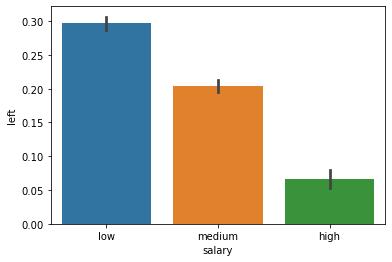

In [51]:
sns.barplot(y='left',x='salary',data=df)

<AxesSubplot:>

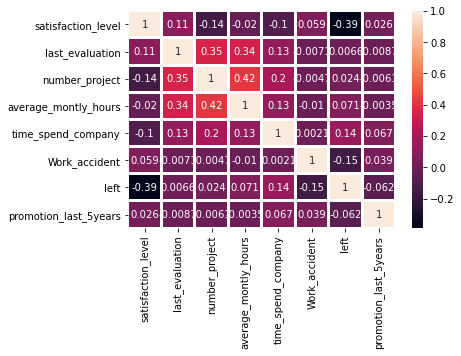

In [52]:
df.corr()
sns.heatmap(df.corr(),xticklabels=df.corr().columns,yticklabels=df.corr().columns,annot=True,linewidth=2)

In [73]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary
0,0.38,0.53,2,157,3,0,1,0,sales,low
1,0.80,0.86,5,262,6,0,1,0,sales,medium
2,0.11,0.88,7,272,4,0,1,0,sales,medium
3,0.72,0.87,5,223,5,0,1,0,sales,low
4,0.37,0.52,2,159,3,0,1,0,sales,low


In [84]:
df=pd.get_dummies(df,columns=['salary'])

In [85]:
df.head()

,satisfaction_level,last_evaluation,number_project,average_montly_hours,time_spend_company,Work_accident,left,promotion_last_5years,Department,salary_high,salary_low,salary_medium
0,0.38,0.53,2,157,3,0,1,0,sales,0,1,0
1,0.80,0.86,5,262,6,0,1,0,sales,0,0,1
2,0.11,0.88,7,272,4,0,1,0,sales,0,0,1
3,0.72,0.87,5,223,5,0,1,0,sales,0,1,0
4,0.37,0.52,2,159,3,0,1,0,sales,0,1,0


In [86]:
x=df[['satisfaction_level','number_project','time_spend_company','promotion_last_5years'
     ,'salary_high','salary_low','salary_medium']]
y=df.left

In [87]:
x.head()

,satisfaction_level,number_project,time_spend_company,promotion_last_5years,salary_high,salary_low,salary_medium
0,0.38,2,3,0,0,1,0
1,0.80,5,6,0,0,0,1
2,0.11,7,4,0,0,0,1
3,0.72,5,5,0,0,1,0
4,0.37,2,3,0,0,1,0


In [90]:
x.shape

(14999, 7)

In [91]:
from sklearn.model_selection import train_test_split
x_train,x_test,y_train,y_test=train_test_split(x,y,train_size=0.3)

In [92]:
from sklearn.linear_model import LogisticRegression

In [94]:
lg=LogisticRegression()
lg.fit(x_train,y_train)

LogisticRegression()

In [95]:
lg.score(x_train,y_train)

0.7710602356079129

In [99]:
lg.score(x_test,y_test)

0.7810476190476191

In [100]:
y_pred=lg.predict(x_test)

In [101]:
y_pred

array([1, 0, 0, ..., 0, 0, 1], dtype=int64)

In [102]:
from sklearn.metrics import confusion_matrix

In [103]:
con_mat=confusion_matrix(y_test,y_pred)
con_mat

array([[7399,  610],
       [1689,  802]], dtype=int64)

Text(69.0, 0.5, 'Actual')

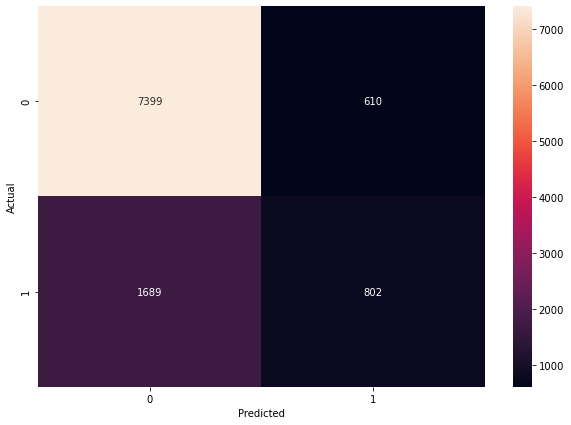

In [106]:
plt.figure(figsize=(10,7))
sns.heatmap(con_mat,annot=True,fmt='g')
plt.xlabel('Predicted')
plt.ylabel('Actual')


In [108]:
from sklearn.metrics import accuracy_score,precision_score,recall_score,f1_score

In [109]:
print('Acuuracy : ',accuracy_score(y_test,y_pred))
print('Precision : ',precision_score(y_test,y_pred))
print('Recall : ',recall_score(y_test,y_pred))
print('f1_Score : ',f1_score(y_test,y_pred))

Acuuracy :  0.7810476190476191
Precision :  0.5679886685552408
Recall :  0.32195905258932156
f1_Score :  0.41096592364847556


In [111]:
from sklearn.metrics import roc_curve,roc_auc_score

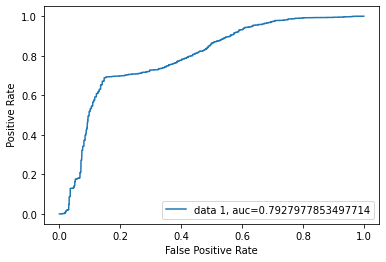

In [116]:
y_pred_proba = lg.predict_proba(x_test)[::,1]
fpr, tpr, threshold = roc_curve(y_test,  y_pred_proba)
auc = roc_auc_score(y_test, y_pred_proba)
plt.plot(fpr,tpr,label="data 1, auc="+str(auc))
plt.legend(loc=4)
plt.xlabel("False Positive Rate")
plt.ylabel(" Positive Rate")

plt.show()